In [5]:
from power_system.Bus_System import Bus_system
import numpy as np
from f_Graph import*
from f_observability import*

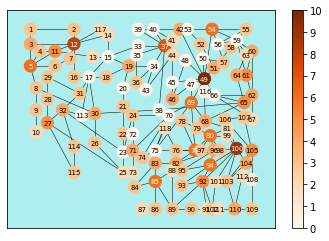

In [11]:
#Carrega sistema do IEEE
bus_sys = Bus_system(118)
meas_plan_file = 'meas_plan118b333m.txt'
meas_plan = np.loadtxt(meas_plan_file,dtype=np.int32)
Graph = build_measurement_dist_graph(bus_sys,meas_plan)
show_measurement_dist_graph(Graph,Graph.coordinates)

In [12]:
#Forma lista de grupos
groups = []
groups.append(np.loadtxt('Grupo1.txt',dtype=int))
groups.append(np.loadtxt('Grupo2.txt',dtype=int))
groups.append(np.loadtxt('Grupo3.txt',dtype=int))
set_groups(Graph,groups)
#show_groups(Graph,Graph.coordinates)

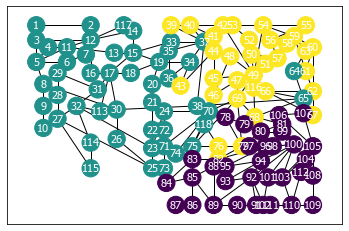

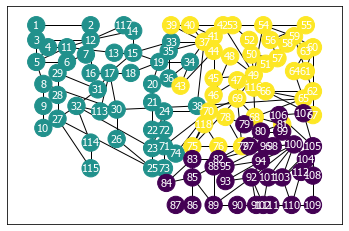

In [13]:
show_groups(Graph,Graph.coordinates)

Copy_Graph = regroup_outliners(Graph)

show_groups(Copy_Graph,Graph.coordinates)

In [14]:
def get_groups(G):
    groups = set(nx.get_node_attributes(Graph,'group').values())
    n_groups = len(groups)
    list_of_groups =  [[] for _ in range(n_groups)]
    for no in G.nodes:
        group = G.nodes[no]['group']  
        list_of_groups[group-1].append(int(no))

    return list_of_groups

In [15]:
def save_groups(groups):
    n_groups = len(groups)
    for i in range(n_groups):
        nome_arquivo = f'Grupo{i+1}_Reorganizado.txt'
        textfile = open(nome_arquivo, "w")
        for elemento in groups[i]:  
            textfile.write(f'{elemento}\n')
        textfile.close()

In [16]:
def build_sub_meas_plan(meas_plan,grupo):
    sub_meas_plan =  []
    print(meas_plan)
    for medida in meas_plan:
        if medida[1] in grupo or medida[2] in grupo:
            sub_meas_plan.append(medida)
    return sub_meas_plan

In [17]:
def monta_Sub_Covax ( med, E):

    # Constroi Matrizes E dos subsistemas
    #array =  np.arange(len(med)*len(med)).reshape(len(med),len(med))
    Eg = np.zeros((len(med),len(med)),np.float64)
    lin = 0
    for medi in med:
        col = 0
        for medj in med :
            de   = medi[0]-1 
            para = medj[0]-1
            Eg[lin,col] =  E[de,para]
            col = col + 1
        lin = lin + 1
    
    return Eg;

In [18]:
def save_splited_meas_plan_n_covrariance(meas_plan,E,groups):
    for i in range(len(groups)):
        
        sub_meas_plan = build_sub_meas_plan(meas_plan,groups[i])
        n_meas= len(sub_meas_plan)
        list_n_meas = [n_meas]

        Eg = monta_Sub_Covax(sub_meas_plan,E)


        nome_arquivo=f'medplan{i+1}_{n_meas}m.txt'
        f=open(nome_arquivo,'a')
        np.savetxt(f, list_n_meas,delimiter=' ',  fmt ='%i')
        np.savetxt(f,sub_meas_plan, delimiter=' ', fmt='%i')
        np.savetxt(f,Eg,delimiter=' ')
        f.close()

In [19]:
def save_sub_covariance(E, meas_plan):
    n_grupos = len(meas_plan)

    for i in range(n_grupos):
        n_med =  len(meas_plan[i])
        Eg = monta_Sub_Covax(meas_plan[i],E)

        
        nome_arquivo=f'medplan{i+1}_{n_med}m.txt'
        f = open(nome_arquivo,'a')
        
        np.savetxt(f,Eg,delimiter=' ')
        f.close()

In [20]:
def save_case(Graph,meas_plan,A):
    
    groups = get_groups(Graph)
    save_groups(groups)

    

    H=build_jacobian_matrix(A,meas_plan)
    G=build_gain_matrix(H)
    E=build_covariance_matrix(G,H)

    save_splited_meas_plan_n_covrariance(meas_plan,E,groups)
    

In [21]:
save_case(Graph,meas_plan,bus_sys.Ybus)

[[  1   1   2 ...   1   1   1]
 [  2   1   3 ...   1   1   1]
 [  3   2   1 ...   1   2   1]
 ...
 [331 115 115 ...   2 115   1]
 [332 117 117 ...   2 117   1]
 [333 118 118 ...   2 118   1]]
[[  1   1   2 ...   1   1   1]
 [  2   1   3 ...   1   1   1]
 [  3   2   1 ...   1   2   1]
 ...
 [331 115 115 ...   2 115   1]
 [332 117 117 ...   2 117   1]
 [333 118 118 ...   2 118   1]]
[[  1   1   2 ...   1   1   1]
 [  2   1   3 ...   1   1   1]
 [  3   2   1 ...   1   2   1]
 ...
 [331 115 115 ...   2 115   1]
 [332 117 117 ...   2 117   1]
 [333 118 118 ...   2 118   1]]


In [23]:
# Arruma diretórios
caso= f'Caso2_prop'
import os
import shutil
dir_origem = 'D:/Doutorado/SegmentaSis/Programa/Read_Segments'

dir_destino = dir_origem + '/' +caso
if not os.path.exists(dir_destino):
    os.makedirs(dir_destino)
arquivos_na_pasta = os.listdir(dir_origem)
for arquivo in arquivos_na_pasta:
    if arquivo.endswith('.txt') or arquivo.endswith('.png'):
        shutil.move(os.path.join(dir_origem,arquivo), os.path.join(dir_destino,dir_destino))